In [1]:
import random as r
import matplotlib.pyplot as plt
import numpy as np

#### Define simulaiton parameters

In [2]:
N = 100 # population size
k = 10 # sample size
n_sample = 100 # number of samples in each estimate of success prob

In [3]:
population = [False] * N

idx = r.randint(0, N - 1)
population[idx] = True

In [4]:
def reservior_sampling():
    """
    One pass through the stream.
    With probability k / N, True will be in the sample.
    """
    N = len(population)
    sample = []
    for n, flag in enumerate(population):
        if len(sample) < k:
            # keep the first k elements
            sample.append(flag)
        else:
            # with probability k / (n + 1), replace an existing element uniformly at random
            if r.random() <= k / (n + 1):
                sample[r.randint(0, k - 1)] = flag
    assert(len(sample) == k)
    return any(sample) is True

In [5]:
def success_prob():
    """
    Success probability is empirically estimated as the
    number od trial that ended up with True in sample.
    """
    success = 0
    for _ in range(n_sample):
        if reservior_sampling():
            success += 1
    prob = success / n_sample
    return prob

print("probability: %.2f%% (expect: %.2f%%)"%(100 * success_prob(), 100 * k / N))

probability: 18.00% (expect: 10.00%)


#### Central Limit Theorem
* Sampling distirbution of success_prob has mean *k/N*, and follows normal distribution.
* Thanks to reservior sampling, the number of samples in each trial that contains True follows binomial distribution

In [6]:
n_trial = 1000
success_probs = [success_prob() for _ in range(n_trial)]

In [7]:
mean_empirical = np.mean(success_probs)
mean_analytical = k / N

se_empirical = np.std(success_probs)
se_analytical = np.sqrt(mean_analytical * (1 - mean_analytical) / N)

print("""
mean_empirical: %.3f
mean_analytical: %.3f
se_empirical: %.3f
se_analytical: %.3f
"""%(mean_empirical, mean_analytical, se_empirical, se_analytical))


mean_empirical: 0.101
mean_analytical: 0.100
se_empirical: 0.030
se_analytical: 0.030



(array([  5.,  14.,  95., 185., 269., 234., 133.,  42.,  17.,   6.]),
 array([0.   , 0.021, 0.042, 0.063, 0.084, 0.105, 0.126, 0.147, 0.168,
        0.189, 0.21 ]),
 <a list of 10 Patch objects>)

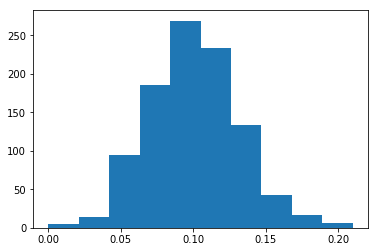

In [8]:
plt.hist(success_probs)